In [1]:
import pickle
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy.linalg import norm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import cv2

In [2]:
feature_list = np.array(pickle.load(open('embeddings.pkl', 'rb')))
filenames = pickle.load(open('filenames.pkl', 'rb'))


In [3]:
feature_list.shape

(44441, 2048)

In [4]:
filenames

['images\\10000.jpg',
 'images\\10001.jpg',
 'images\\10002.jpg',
 'images\\10003.jpg',
 'images\\10004.jpg',
 'images\\10005.jpg',
 'images\\10006.jpg',
 'images\\10007.jpg',
 'images\\10008.jpg',
 'images\\10009.jpg',
 'images\\10010.jpg',
 'images\\10011.jpg',
 'images\\10012.jpg',
 'images\\10013.jpg',
 'images\\10014.jpg',
 'images\\10015.jpg',
 'images\\10016.jpg',
 'images\\10017.jpg',
 'images\\10018.jpg',
 'images\\10019.jpg',
 'images\\10020.jpg',
 'images\\10021.jpg',
 'images\\10022.jpg',
 'images\\10023.jpg',
 'images\\10024.jpg',
 'images\\10025.jpg',
 'images\\10026.jpg',
 'images\\10027.jpg',
 'images\\10028.jpg',
 'images\\10029.jpg',
 'images\\10030.jpg',
 'images\\10031.jpg',
 'images\\10032.jpg',
 'images\\10033.jpg',
 'images\\10034.jpg',
 'images\\10035.jpg',
 'images\\10037.jpg',
 'images\\10039.jpg',
 'images\\10040.jpg',
 'images\\10041.jpg',
 'images\\10042.jpg',
 'images\\10043.jpg',
 'images\\10044.jpg',
 'images\\10045.jpg',
 'images\\10046.jpg',
 'images\\

In [5]:
df_filenames = pd.DataFrame(filenames)

In [6]:
df_filenames

,0
0,images\10000.jpg
1,images\10001.jpg
2,images\10002.jpg
3,images\10003.jpg
4,images\10004.jpg
...,...
44436,images\9995.jpg
44437,images\9996.jpg
44438,images\9997.jpg
44439,images\9998.jpg


In [7]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

In [12]:
img = image.load_img('Sample/shirt.jpg', target_size=(224, 224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


In [13]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')
neighbors.fit(feature_list)

distances, indices = neighbors.kneighbors([normalized_result])

In [14]:
print(distances)
print(indices)

[[0.         0.50214088 0.5243513  0.53279585 0.53345942 0.55485797]]
[[ 1338  1347 17338  6811  3299 18167]]


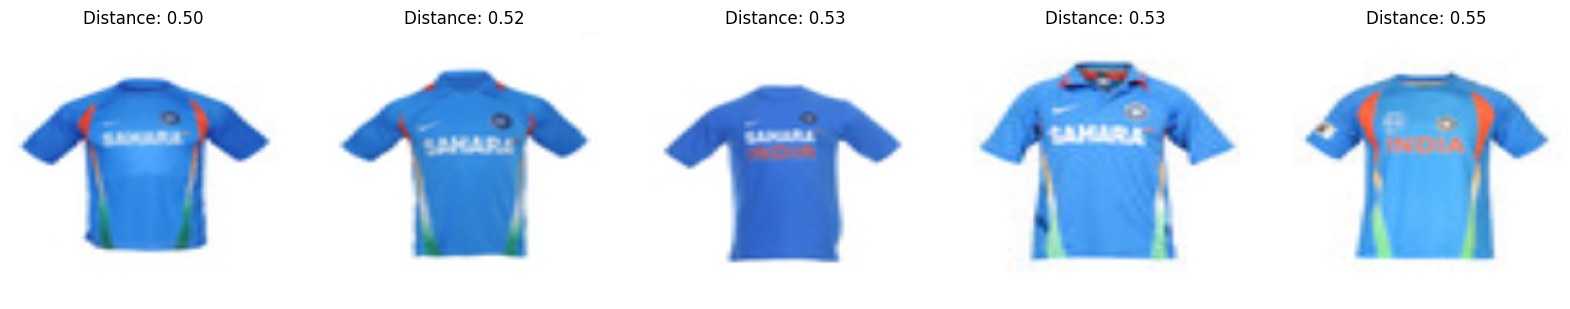

In [15]:
plt.figure(figsize=(20, 10))

for i, idx in enumerate(indices[0][0:5]):
    img = cv2.imread(filenames[idx])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i + 1)
    plt.imshow(cv2.resize(img, (224, 224)))
    plt.title(f'Distance: {distances[0][i+1]:.2f}')
    plt.axis('off')

plt.show()